In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the ex2data2.txt data from the data folder
# the 1rst column is the test1 score, the 2nd column is the test2 score and the 3rd column is the result: 1 = accepted and 0 = not accepted 
chip = np.loadtxt("./data/ex2data2.txt", delimiter=",")
chip

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

# Do the following plot
![title](chip_scatter_plot.png)

In [3]:
X = np.c_[chip[:,0:2]]
y = np.c_[chip[:,-1]]

In [4]:
pos = (y == 1).ravel()
neg = (y == 0).ravel()

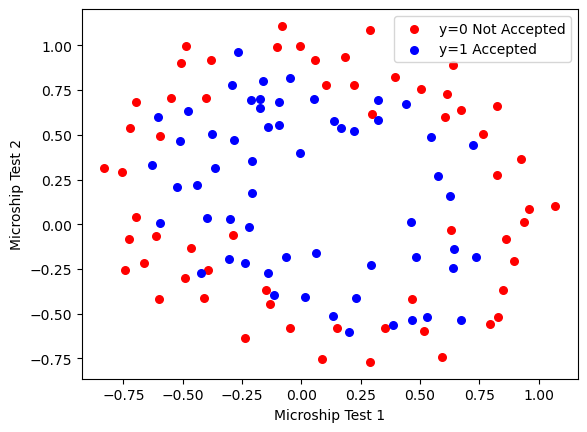

In [5]:
plt.scatter(X[neg, 0], X[neg, 1], s=30, c='r', marker='o', linewidths=1, label='y=0 Not Accepted')
plt.scatter(X[pos, 0], X[pos, 1], s=30, c='b', marker='o', linewidths=1, label='y=1 Accepted')
plt.xlabel('Microship Test 1')
plt.ylabel('Microship Test 2')
plt.legend()

# Using the artificial neural network we built in class, run the train function on the chip data and plot the cost function below
![title](chip_cost_function.png)


In [5]:
X_mean = np.mean(X,0)
X_norm = X - X_mean
X_std = np.std(X_norm,0)

In [6]:
X_norm = X_norm / X_std

In [7]:
X_norm = X_norm.T
y = y.T

In [13]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    e_x = np.exp(x - np.max(x)) 
    return e_x / e_x.sum(axis=0)


In [8]:
def initParams(X, y, hidden_units):
    n = X_norm.shape[0]
    n_y = y.shape[0]
    w1 = np.random.rand( hidden_units , n ) - 0.5
    b1 = np.random.rand( hidden_units , 1 ) - 0.5
    w2 = np.random.rand( n_y , hidden_units ) - 0.5
    b2 = np.random.rand( n_y , 1 ) - 0.5
    return w1, b1, w2, b2

In [9]:
params = initParams( X_norm , y , hidden_units= 4 )

In [10]:
w1, b1, w2, b2 = params[0], params[1], params[2], params[3]

In [44]:
def forwardPropagation(X, params):
    w1 = params[0]
    b1 = params[1]
    w2 = params[2]
    b2 = params[3]
    
    Z1 = np.dot(w1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(w2,A1) + b2
    A2 = sigmoid(Z2)

    epsilon = 1e-15 
    A2 = np.clip(A2, epsilon, 1 - epsilon)

    return Z1, A1, Z2, A2

In [32]:
cache = forwardPropagation(X_norm, params)

In [33]:
Z1, A1, Z2, A2  = cache[0], cache[1], cache[2], cache[3]

In [18]:
def computeCost(y, A2):
    m = y.shape[1]
    cost = -(1/m) *(np.sum(y*np.log(A2)+(1-y)*np.log(1-A2)))
    return cost

In [34]:
def backPropagation(X, y, cache, params):

    m = y.shape[1]
    
    w1 = params[0]
    b1 = params[1]
    w2 = params[2]
    b2 = params[3]
    
    Z1 = cache[0]
    A1 = cache[1]
    Z2 = cache[2]
    A2 = cache[3]

    dZ2 = A2 - y
    dw2 = (1/m) * (dZ2).dot(A1.T)
    db2 = (1/m) * (np.sum(dZ2))
    dZ1 = (w2.T).dot(dZ2) * (1- A1**2)
    dw1 = (1/m) * (dZ1).dot(X.T)
    db1 = (1/m) * (np.sum(dZ1))

    return dw1, db1, dw2, db2

In [35]:
grads = backPropagation(X_norm, y, cache, params)

In [36]:
dw1, db1, dw2, db2 = grads[0], grads[1], grads[2], grads[3]

In [37]:
def updateParams(params, grads, learning_rate = 0.01):

    w1 = params[0]
    b1 = params[1]
    w2 = params[2] 
    b2 = params[3]
    
    dw1 = grads[0]
    db1 = grads[1]
    dw2 = grads[2]
    db2 = grads[3]

    w1 = w1-learning_rate*dw1
    b1 = b1-learning_rate*db1
    w2 = w2-learning_rate*dw2
    b2 = b2-learning_rate*db2

    return w1,b1,w2,b2

In [38]:
params = updateParams(params, grads)

In [39]:
w1, b1, w2, b2 = w1, b1, w2, b2

In [40]:
def get_predictions(A2):
    return np.where(A2 >= 0.5, 1, 0)

In [41]:
def get_accuracy(y_predicted, y):
    return np.sum(y_predicted == y) / y.size

In [60]:
def train(X, y, hidden_units = 40, epochs = 300000, learning_rate = 0.08):
    
    params = initParams(X, y, hidden_units)
    cost_history = []
    n_print = epochs//6

    for i in range(epochs):
        cache = forwardPropagation(X, params)
        A2 = cache[3]
        cost = computeCost(y, A2)*100
        grads = backPropagation(X, y, cache, params) 
        params = updateParams(params, grads, learning_rate)
        cost_history.append(cost)

        if (i+1) % n_print == 0:
            predictions = get_predictions(A2)
            accu = get_accuracy(predictions, y)
            
            print("Iteration", i+1, " | Cost: ", cost, " | Accuracy: ", accu,"\n")
            
   

    w1 = params[0]
    b1 = params[1]
    w2 = params[2]
    b2 = params[3]
    
    return w1, b1, w2, b2, cost_history

In [65]:
w1, b1, w2, b2, cost_history = train(X_norm, y, hidden_units = 40, epochs = 300000, learning_rate = 0.08)

Iteration 50000  | Cost:  21.09297289390867  | Accuracy:  0.8898305084745762 

Iteration 100000  | Cost:  18.692475304784487  | Accuracy:  0.9322033898305084 

Iteration 150000  | Cost:  17.39611044666831  | Accuracy:  0.9322033898305084 

Iteration 200000  | Cost:  16.720061127565568  | Accuracy:  0.9322033898305084 

Iteration 250000  | Cost:  16.294263081550262  | Accuracy:  0.9322033898305084 

Iteration 300000  | Cost:  15.986459708449877  | Accuracy:  0.9322033898305084 



Text(0, 0.5, 'Cost value')

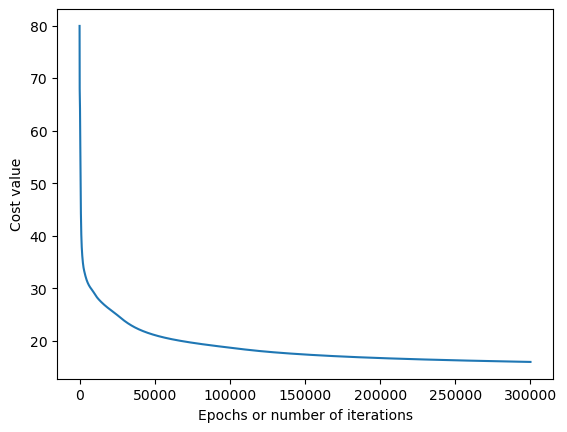

In [66]:
plt.plot(cost_history)
plt.xlabel('Epochs or number of iterations')
plt.ylabel('Cost value')

# plot the decision boundary below
![title](chip_decision_boundary.png)

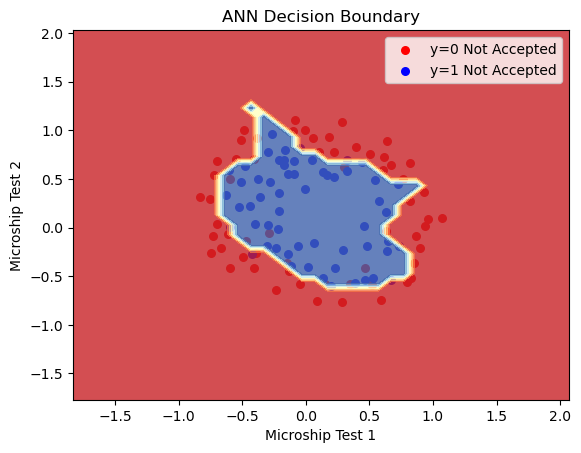

In [67]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
z = np.c_[xx.ravel(), yy.ravel()]
z_norm = (z - X_mean)/X_std
params = [w1, b1, w2, b2]
cache = forwardPropagation(z_norm.T, params)
A2 = cache[3]
Z = get_predictions(A2)
Z = Z.reshape(xx.shape)

plt.scatter(X[neg, 0], X[neg, 1], s=30, c='r', marker='o', linewidths=1, label='y=0 Not Accepted')
plt.scatter(X[pos, 0], X[pos, 1], s=30, c='b', marker='o', linewidths=1, label='y=1 Not Accepted')
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.xlabel('Microship Test 1')
plt.ylabel('Microship Test 2')
plt.title('ANN Decision Boundary')
plt.legend()
plt.show()